In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)             # seed는 고정시키기 위한 것. 300이하로 설정하는 것이 좋다. 
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)                                           # 넘파이 파일을 데이터베이스에 담아야 한다.

((404, 13), (404,), (102, 13), (102,), numpy.ndarray)

연속형이기 때문에 y값을 볼 필요는 없다. 

In [3]:
import pandas as pd

In [4]:
dfr = pd.DataFrame(x_train)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [23]:
import sqlite3

In [25]:
connect = sqlite3.connect('./db.sqlite3')

In [28]:
dfr.to_sql('boston_housing_resource', connect, if_exists='append', index=False)

In [29]:
df = pd.read_sql_query('select * from boston_housing_resource', connect)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [30]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


float 타입이기 때문에 숫자에 space가 없다. 

In [ ]:
dfr.describe()

컬럼마다 데이터값이 크게 차이가 나기 때문에 스케일링을 해줘야 한다. standardscaler

In [6]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [33]:
df = pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,7.832019e-18,7.364846e-17,2.748077e-18,1.019536e-16,3.022884e-17,-1.690067e-17,1.099231e-17,6.485461e-17,1.951135e-17,-1.648846e-17,-2.473269e-17,1.147322e-17,-1.209154e-17
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [35]:
df.to_sql('boston_housing_scale_x_train', connect, if_exists='append', index=False)

In [36]:
dfr = pd.read_sql_query('select * from boston_housing_scale_x_train', connect)

In [38]:
dfr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,7.832019e-18,7.364846e-17,2.748077e-18,1.019536e-16,3.022884e-17,-1.690067e-17,1.099231e-17,6.485461e-17,1.951135e-17,-1.648846e-17,-2.473269e-17,1.147322e-17,-1.209154e-17
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


# Model and fit

In [55]:
model = tf.keras.models.Sequential()

In [56]:
model.add(tf.keras.Input(shape=(13)) )  # input layer     # 교육시킬때와 서비스할때의 값이 동일해야 하는데 변화되는 값을 넣을 수 없기 때문에(행의 갯수는 계속 변한다) 변화되지 않는 값인 열(컬럼)의 값을 넣는다. 

model.add(tf.keras.layers.Dense(128, activation='relu')) # 기능 layer = hidden layer  # 파라미터에서 =이 없는 것은 꼭 넣어줘야 한다. 값이 꼭 들어가야 하는 것은 파라미터의 순서에서 앞에 위치한다. None은 꼭 들어가지 않아도 되거나 사용자의 판단에 맡기는 값이다.   
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1,)) # output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])           # mae 연속형일때 평가방식 중 mae가 좋다. 분류형일 경우는 acc로 하는 것이 좋다. 둘 다 loss율 모두 확인해야 함. 

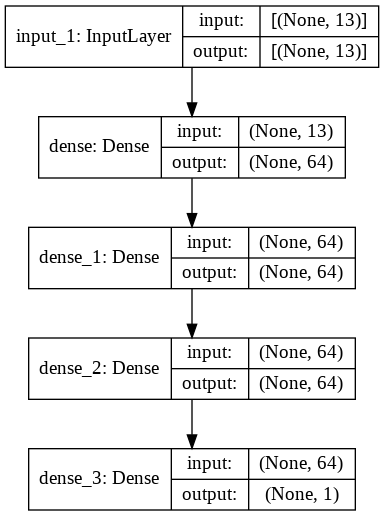

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [58]:
hist = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
9/9 [==============================] - 0s 13ms/step - loss: 0.3923 - mae: 0.4304 - val_loss: 18.1680 - val_mae: 2.7998
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 0.4382 - mae: 0.4778 - val_loss: 18.7316 - val_mae: 2.8087
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.2287 - mae: 0.3195 - val_loss: 17.9693 - val_mae: 2.7511
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2612 - mae: 0.3258 - val_loss: 18.5063 - val_mae: 2.8298
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 0.4331 - mae: 0.4746 - val_loss: 18.7058 - val_mae: 2.8088
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 0.5518 - mae: 0.5113 - val_loss: 19.1723 - val_mae: 2.8606
Epoch 7/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6559 - mae: 0.6047 - val_loss: 19.4320 - val_mae: 2.9469
Epoch 8/500
9/9 [==============================] - 0s 7ms/step - loss: 0.5250 - mae: 0.56

# evaluation   평가, 사정(valuation); [수학] 값을 구함

In [59]:
hist.history.keys()     # hist가 담고 있는 값을 볼 수 있다. 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

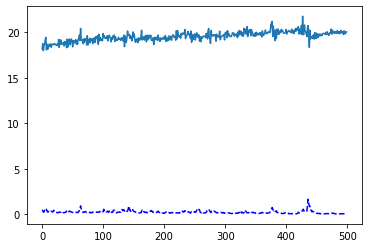

In [61]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

In [15]:
# model.evaluate(x_train, y_train)    # activation = sigmoid    - loss: 8.5889 - mae: 2.2087

13/13 [==============================] - 0s 1ms/step - loss: 8.5889 - mae: 2.2087


[8.588859558105469, 2.2087457180023193]

In [50]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.1932 - mae: 0.3382


[0.1931813806295395, 0.3382242023944855]

# Service

In [52]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

In [21]:
model.predict([[ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

array([[13.882275]], dtype=float32)

In [53]:
y_train[10]

12.1